# weather Prediction

## loading libraries

In [247]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import joblib

## Step 1: Data Preprocessing

In [248]:
# Load the data
data = pd.read_csv('weatherAUS.csv')

In [249]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [250]:
#to know the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [251]:
data['Date']=pd.to_datetime(data['Date'])

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [253]:
# Check for missing values
print(data.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


<Axes: >

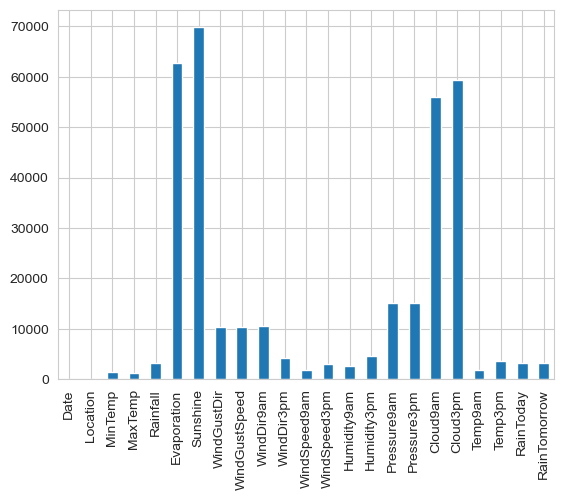

In [254]:
data.isnull().sum().plot(kind='bar')

## to check outliers

<Axes: >

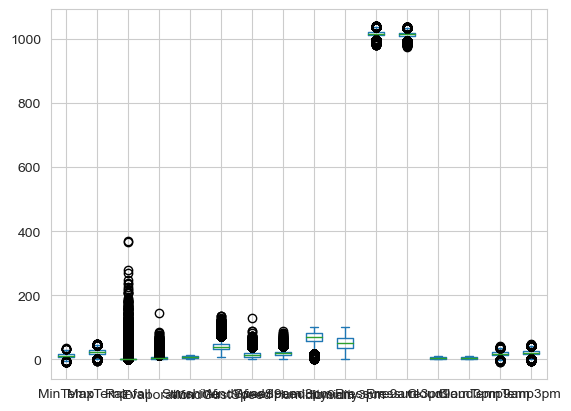

In [255]:
data.plot(kind='box')

## to check relations

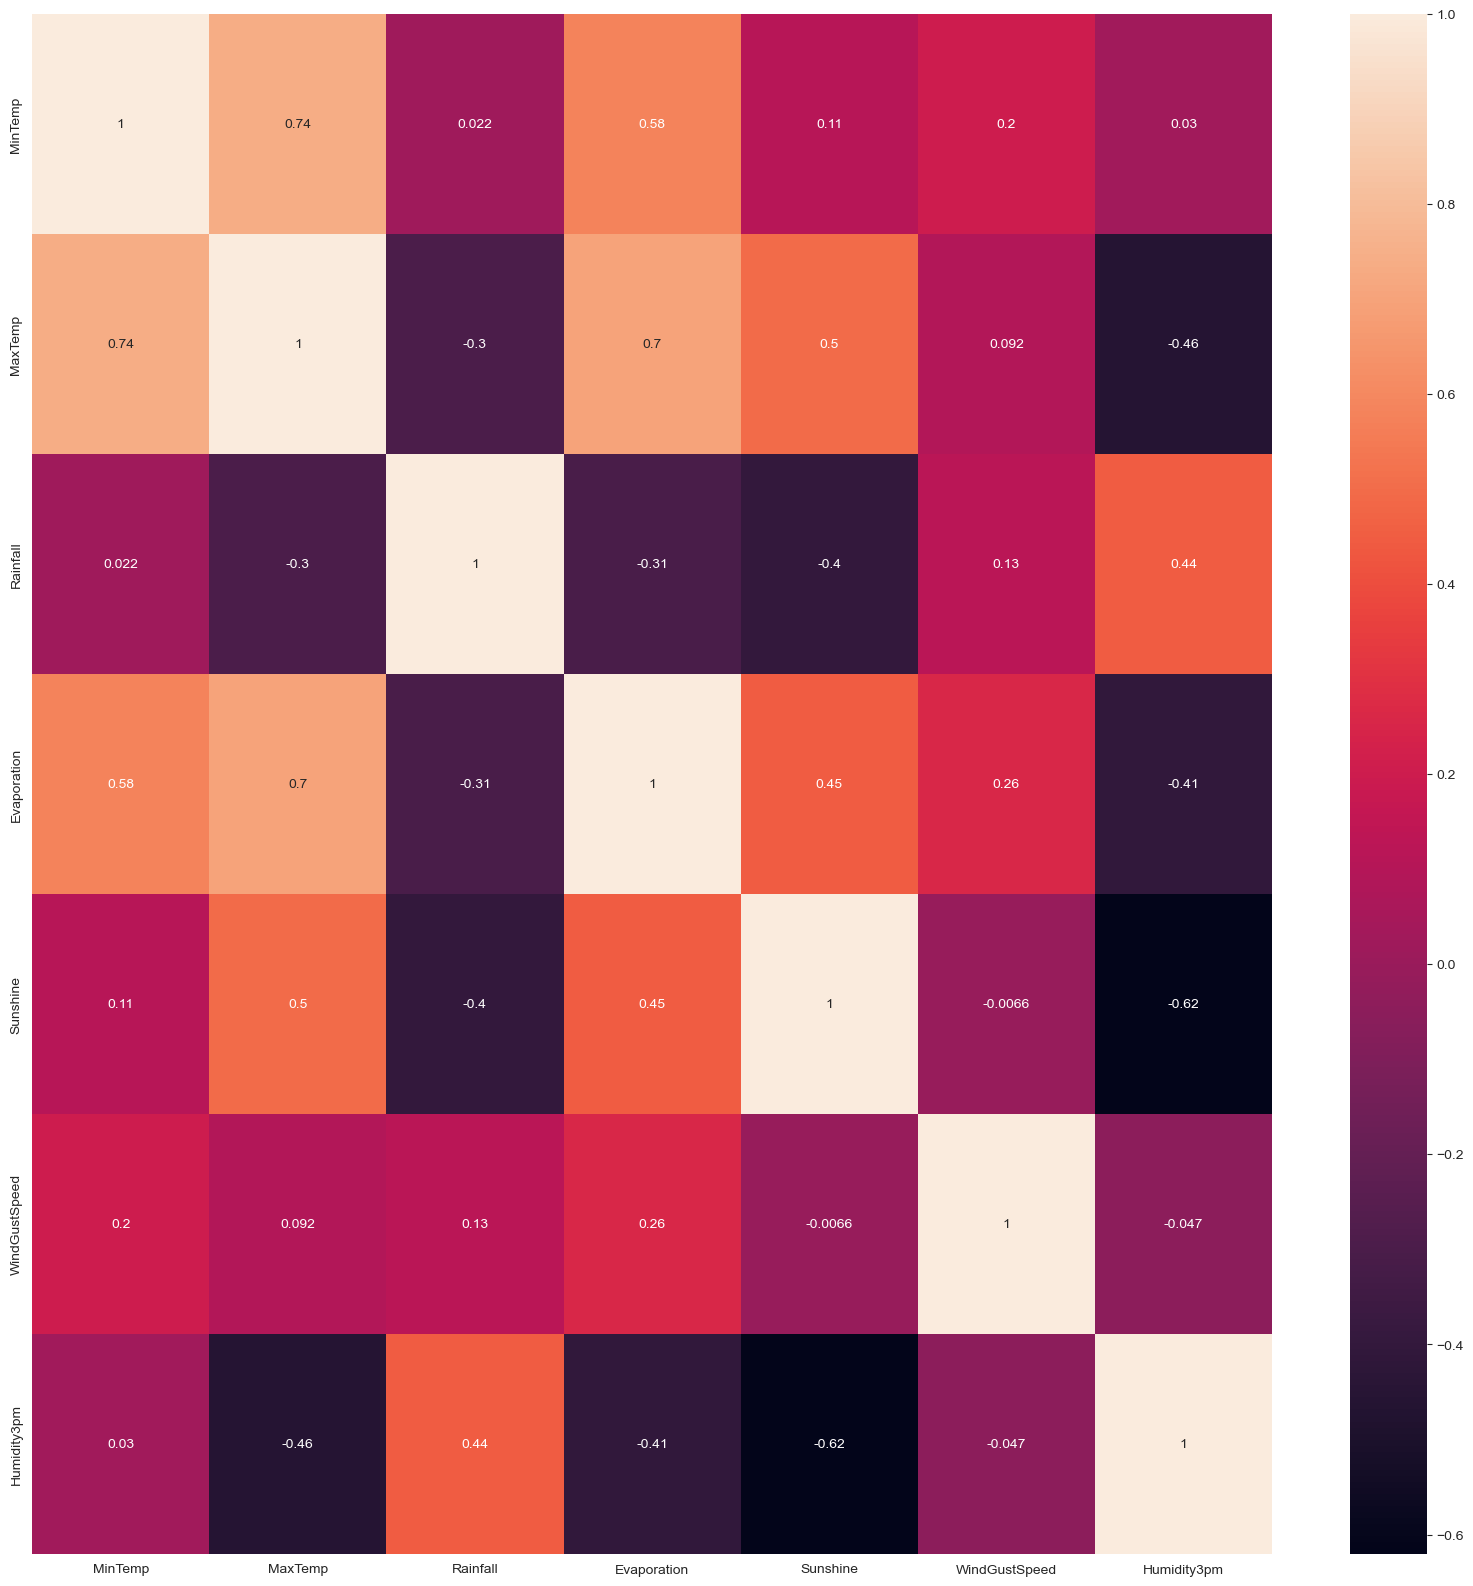

In [256]:
corrmat = data.iloc[:,[2,3,4,5,6,8,11-20]].corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

## to check skewness and kurtosis

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


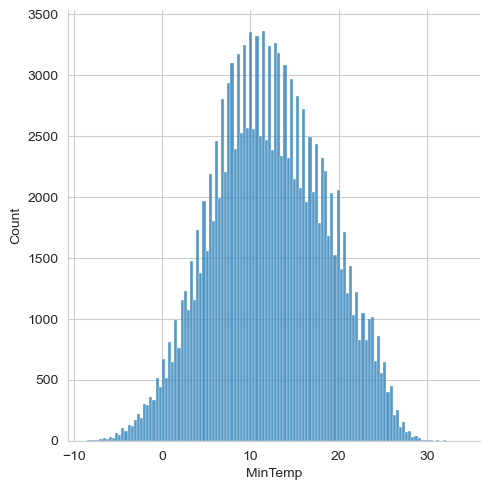

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


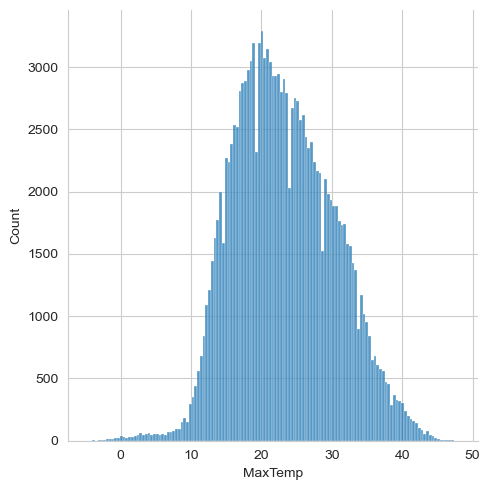

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


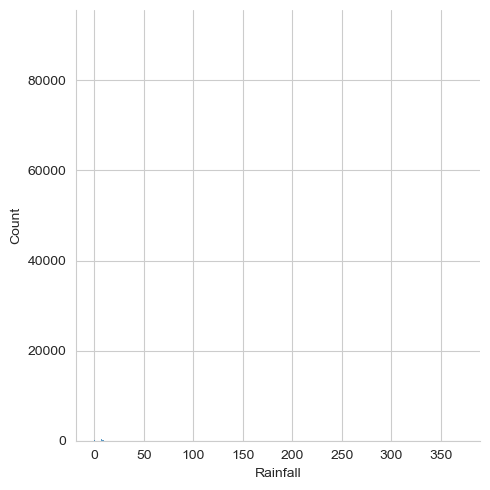

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


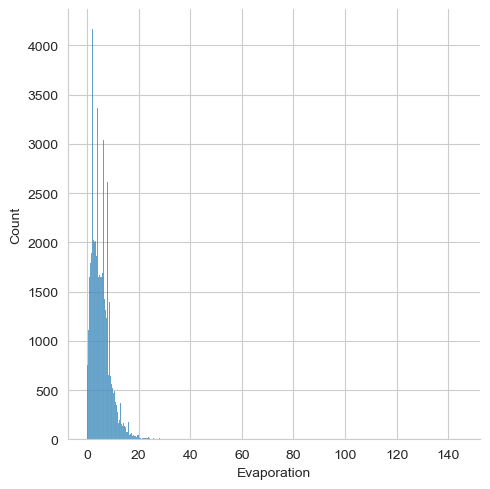

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


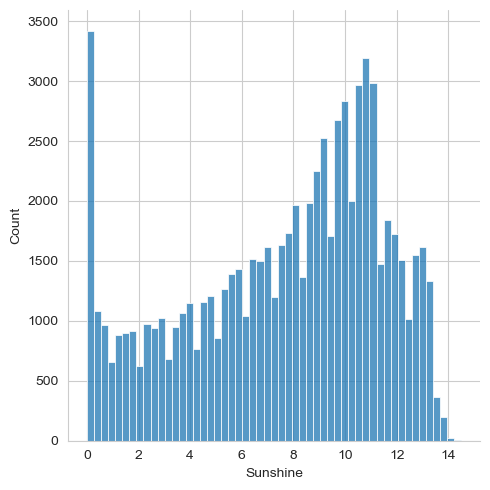

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


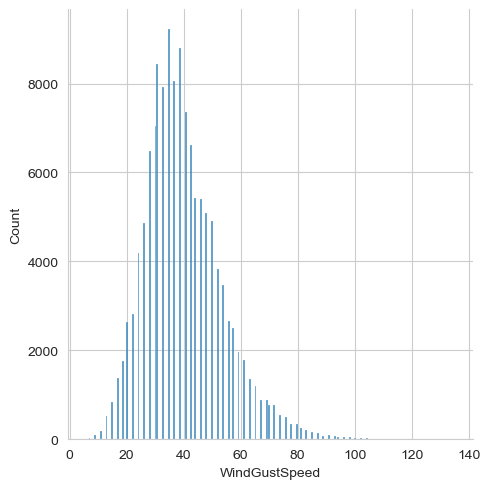

C:\Users\alika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


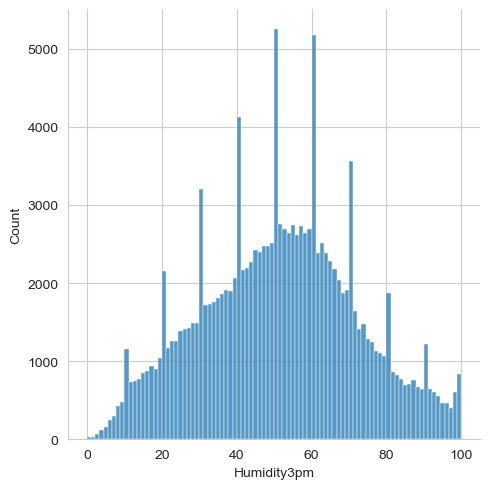

In [257]:
#to  check the skewness and kurtosis
for i in [2,3,4,5,6,8,11-20]:
    sns.displot(data.iloc[:,i])
    plt.show()

## handling duplicate values

In [258]:
#to check the duplicates
data.duplicated().sum()

0

In [259]:
#to show the duplicate
data[data.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [260]:
#to remove the duplicates
data=data.drop_duplicates()

## handling missing values

In [261]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data = imputer.fit_transform(data)
data

array([[Timestamp('2008-12-01 00:00:00'), 'Albury', 13.4, ..., 21.8,
        'No', 'No'],
       [Timestamp('2008-12-02 00:00:00'), 'Albury', 7.4, ..., 24.3, 'No',
        'No'],
       [Timestamp('2008-12-03 00:00:00'), 'Albury', 12.9, ..., 23.2,
        'No', 'No'],
       ...,
       [Timestamp('2017-06-23 00:00:00'), 'Uluru', 5.4, ..., 26.1, 'No',
        'No'],
       [Timestamp('2017-06-24 00:00:00'), 'Uluru', 7.8, ..., 26.0, 'No',
        'No'],
       [Timestamp('2017-06-25 00:00:00'), 'Uluru', 14.9, ..., 20.9, 'No',
        'No']], dtype=object)

## handling categorical values

In [262]:
columns = [
    "Date", "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", 
    "Sunshine", "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", 
    "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", 
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", 
    "Temp3pm", "RainToday", "RainTomorrow"
]
data = data
df = pd.DataFrame(data, columns=columns)

# Convert 'Date' to numerical (optional: based on timestamp ordinal)
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

# Identify categorical columns
categorical_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

# Initialize LabelEncoder
le_dict = {}

# Apply LabelEncoder only to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Display the transformed dataset
print("Transformed Data:")
print(df.head(5))
print(le_dict)


Transformed Data:
     Date  Location MinTemp MaxTemp Rainfall Evaporation Sunshine  \
0  733377         2    13.4    22.9      0.6         4.0      0.0   
1  733378         2     7.4    25.1      0.0         4.0      0.0   
2  733379         2    12.9    25.7      0.0         4.0      0.0   
3  733380         2     9.2    28.0      0.0         4.0      0.0   
4  733381         2    17.5    32.3      1.0         4.0      0.0   

   WindGustDir WindGustSpeed  WindDir9am  ...  Humidity9am Humidity3pm  \
0           13          44.0          13  ...         71.0        22.0   
1           14          44.0           6  ...         44.0        25.0   
2           15          46.0          13  ...         38.0        30.0   
3            4          24.0           9  ...         45.0        16.0   
4           13          41.0           1  ...         82.0        33.0   

  Pressure9am Pressure3pm Cloud9am Cloud3pm Temp9am Temp3pm RainToday  \
0      1007.7      1007.1      8.0      7.0    16

In [263]:
# Split the data into features and target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y = np.array(y,dtype=float)
print(y)

[0. 0. 0. ... 0. 0. 0.]


In [264]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [265]:
y_train.flatten()

array([1., 0., 0., ..., 0., 0., 0.])

In [266]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 116368 entries, 22926 to 43567
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           116368 non-null  int64 
 1   Location       116368 non-null  int32 
 2   MinTemp        116368 non-null  object
 3   MaxTemp        116368 non-null  object
 4   Rainfall       116368 non-null  object
 5   Evaporation    116368 non-null  object
 6   Sunshine       116368 non-null  object
 7   WindGustDir    116368 non-null  int32 
 8   WindGustSpeed  116368 non-null  object
 9   WindDir9am     116368 non-null  int32 
 10  WindDir3pm     116368 non-null  int32 
 11  WindSpeed9am   116368 non-null  object
 12  WindSpeed3pm   116368 non-null  object
 13  Humidity9am    116368 non-null  object
 14  Humidity3pm    116368 non-null  object
 15  Pressure9am    116368 non-null  object
 16  Pressure3pm    116368 non-null  object
 17  Cloud9am       116368 non-null  object
 18  Cloud3

In [267]:
# Initialize StandardScaler
scaler = StandardScaler()
print(X_train)
# Fit the scaler only on X_train and transform both X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

          Date  Location MinTemp MaxTemp Rainfall Evaporation Sunshine  \
22926   735304        27    18.8    23.7      0.2         5.0      7.3   
80735   736243        44     9.3    24.0      0.2         1.6     10.9   
121764  734380        31    10.9    22.2      1.4         1.2      9.6   
139821  733934        13    19.3    29.9      0.0         9.2     11.0   
1867    735333         2    15.7    17.6     12.4         4.0      0.0   
...        ...       ...     ...     ...      ...         ...      ...   
41993   735952        45    17.8    38.1      0.0        26.0      0.0   
97639   734573         0    12.5    27.3      0.0         4.0     10.0   
95939   736125        39    17.0    29.8      0.0         5.6      0.0   
117952  733731        32    11.9    22.0      3.8         6.2      7.7   
43567   734427        47    12.0    16.7      0.8         4.0      0.0   

        WindGustDir WindGustSpeed  WindDir9am  ...  WindSpeed3pm Humidity9am  \
22926             2          52

In [268]:
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(le_dict, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## model performing

Logistic Regression Accuracy: 0.8426
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22726
         1.0       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092

Decision Tree Accuracy: 0.7873
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     22726
         1.0       0.51      0.52      0.52      6366

    accuracy                           0.79     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.79      0.79      0.79     29092

Random Forest Accuracy: 0.8558
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22726
         1.0       0.76      0.49      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      

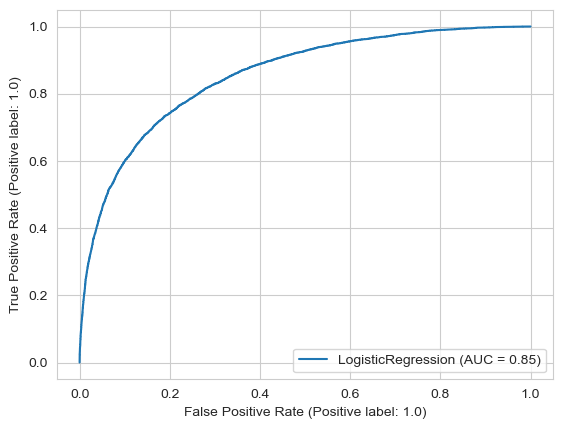

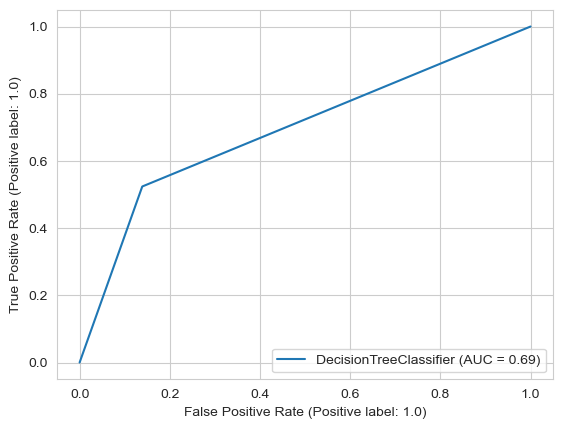

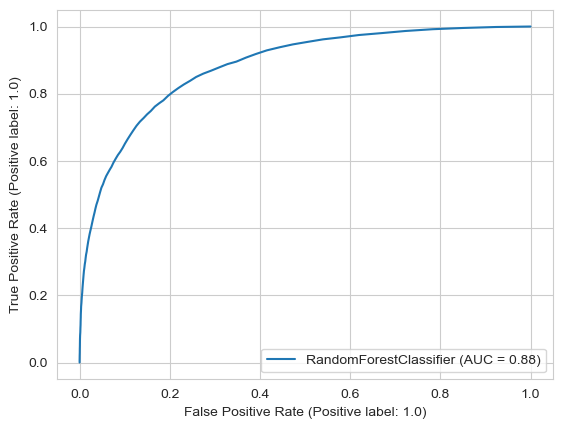

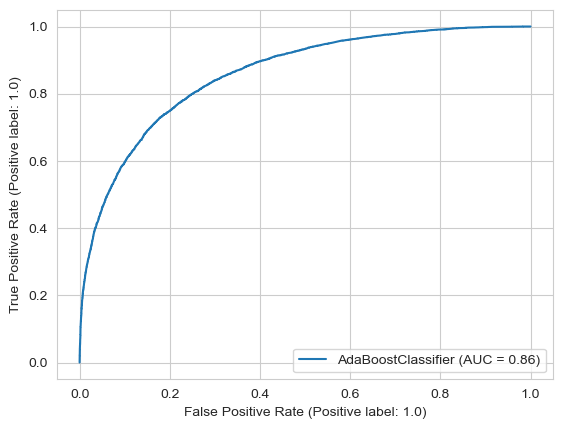

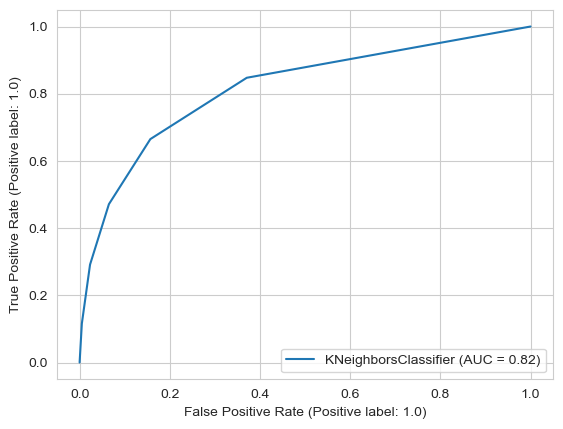

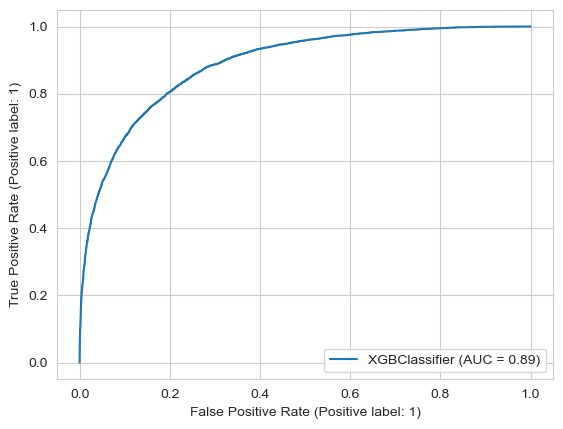

In [269]:
# Step 3: Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
   'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(n_estimators=50, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Xgboost':XGBClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test,y_pred))
    mp=model
    metrics.RocCurveDisplay.from_estimator(mp, X_test, y_test)
    metrics.roc_auc_score(y_test, y_pred, average=None)
    


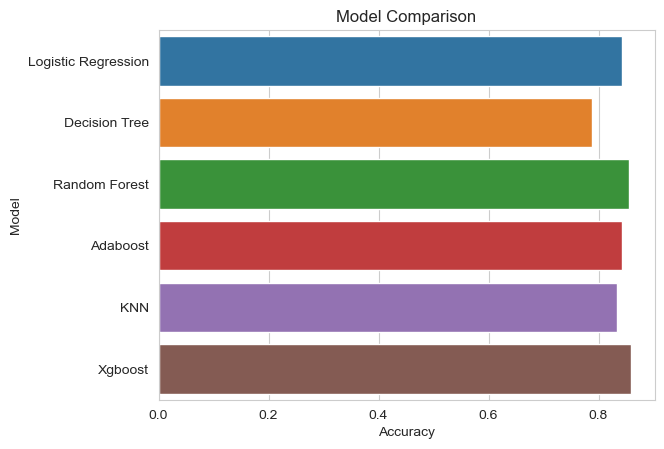

In [270]:
# Step 4: Compare Model Accuracy
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Comparison')
plt.show()

In [271]:
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[0 1 0 ... 0 0 0]
0.8630207617214355


In [272]:
X_train_original = scaler.inverse_transform(X_train)

# Inverse transform to get the original values for X_test
X_test_original = scaler.inverse_transform(X_test)

# Print to verify
print("Original X_train values after inverse scaling:\n", X_train_original)


Original X_train values after inverse scaling:
 [[7.35304000e+05 2.70000000e+01 1.88000000e+01 ... 2.14000000e+01
  2.22000000e+01 2.77555756e-17]
 [7.36243000e+05 4.40000000e+01 9.30000000e+00 ... 1.43000000e+01
  2.32000000e+01 2.77555756e-17]
 [7.34380000e+05 3.10000000e+01 1.09000000e+01 ... 1.66000000e+01
  2.15000000e+01 1.00000000e+00]
 ...
 [7.36125000e+05 3.90000000e+01 1.70000000e+01 ... 2.41000000e+01
  2.90000000e+01 2.77555756e-17]
 [7.33731000e+05 3.20000000e+01 1.19000000e+01 ... 1.71000000e+01
  1.97000000e+01 1.00000000e+00]
 [7.34427000e+05 4.70000000e+01 1.20000000e+01 ... 1.47000000e+01
  1.64000000e+01 2.77555756e-17]]


In [273]:
X_test

array([[ 0.66020173, -1.46300056,  1.52638812, ...,  1.98725801,
         2.00944348,  1.88487099],
       [ 0.69927855,  1.27863758,  1.30653746, ...,  1.59963341,
         2.05322257, -0.53054029],
       [-1.44017706,  0.8568471 , -1.11181977, ..., -1.06722385,
        -0.80701096, -0.53054029],
       ...,
       [-0.62173489,  0.71625027, -0.24812076, ..., -0.97419394,
        -1.12805758,  1.88487099],
       [ 1.17796953,  0.57565344,  1.00816871, ...,  0.66933436,
         0.60851277, -0.53054029],
       [-1.80923587,  0.92714551, -0.81345102, ..., -0.71060922,
        -0.73404582, -0.53054029]])

In [274]:
# Now, use inverse_transform only for categorical columns
for col in categorical_columns:
    df[col] = le_dict[col].inverse_transform(df[col])

# Display the inverse transformed data
print("Inverse Transformed Data:")
print(df.head(5))

Inverse Transformed Data:
     Date Location MinTemp MaxTemp Rainfall Evaporation Sunshine WindGustDir  \
0  733377   Albury    13.4    22.9      0.6         4.0      0.0           W   
1  733378   Albury     7.4    25.1      0.0         4.0      0.0         WNW   
2  733379   Albury    12.9    25.7      0.0         4.0      0.0         WSW   
3  733380   Albury     9.2    28.0      0.0         4.0      0.0          NE   
4  733381   Albury    17.5    32.3      1.0         4.0      0.0           W   

  WindGustSpeed WindDir9am  ... Humidity9am Humidity3pm Pressure9am  \
0          44.0          W  ...        71.0        22.0      1007.7   
1          44.0        NNW  ...        44.0        25.0      1010.6   
2          46.0          W  ...        38.0        30.0      1007.6   
3          24.0         SE  ...        45.0        16.0      1017.6   
4          41.0        ENE  ...        82.0        33.0      1010.8   

  Pressure3pm Cloud9am Cloud3pm Temp9am Temp3pm RainToday RainTomo

In [275]:
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

In [276]:
pickle_in = open("xgb.pkl","rb")
classifier=joblib.load(pickle_in)
data_array = np.array([[733547, 0, 13.4, 22.9, 0.6, -1.0, -1.0, 3, 44.0, 3, 3, 20.0, 
                        24.0, 71.0, 22.0, 1007.7, 1007.1, 8.0, -1.0, 16.9, 21.8, 0]])

prediction=classifier.predict(data_array)
print(prediction)

[1]


In [277]:
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [278]:
for col in categorical_columns:
    df[col] = le_dict[col].inverse_transform(df[col])

# Display the inverse transformed data
print("Inverse Transformed Data:")
print(df.head(5))
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [279]:
dataframe

,Rain on Tommorrow,Predition of Rain
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
29087,0.0,1.0
29088,0.0,0.0
29089,1.0,0.0
29090,0.0,0.0


In [280]:
dttt=pd.DataFrame(X_train)
dttt

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.371467,0.224161,1.039576,0.073280,-0.250881,0.052727,0.716895,-1.299560,0.932633,-1.109031,...,1.077272,0.234615,1.046686,-0.135810,-0.203455,-0.168096,0.607273,0.684839,0.083164,-0.530540
1,1.390721,1.419234,-0.452268,0.115584,-0.250881,-0.993685,1.486697,-0.873230,0.629348,-0.222370,...,0.620571,0.234615,0.166056,0.116457,-0.098373,-0.942745,-0.217873,-0.416015,0.229094,-0.530540
2,-0.631504,0.505355,-0.201010,-0.138242,-0.108947,-1.116792,1.208713,0.832088,-1.038724,-0.887365,...,-0.863708,0.806308,-0.225335,0.012583,-0.053338,-1.717393,-1.455591,-0.059400,-0.018987,1.884871
3,-1.115622,-0.760016,1.118094,0.947572,-0.274537,1.345354,1.508081,-1.299560,0.250240,-1.109031,...,-0.178656,-1.324547,-0.714574,-0.239684,-0.473665,-1.717393,-1.868163,0.963929,1.090083,-0.530540
4,0.402946,-1.533299,0.552764,-0.786911,1.192119,-0.255041,-0.844092,-1.725889,-1.493652,-1.109031,...,-0.635357,1.585889,2.367631,-0.343559,-0.713852,0.993876,1.019845,-0.074905,-0.631895,1.884871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,1.074850,1.489533,0.882540,2.103893,-0.274537,6.515862,-0.844092,-0.873230,-0.053045,-0.444035,...,-0.635357,-0.441022,-1.057041,-0.447433,-0.833945,-1.717393,-1.868163,1.305039,2.213746,-0.530540
116364,-0.422009,-1.673896,0.050248,0.580933,-0.274537,-0.255041,1.294247,1.045252,-0.735438,-0.887365,...,-0.635357,-0.492994,-0.959193,0.250010,0.306941,0.606552,0.607273,0.002620,0.710664,-0.530540
116365,1.262636,1.067742,0.756911,0.933470,-0.274537,0.237388,-0.844092,-1.512724,-1.342010,-0.000705,...,-0.635357,0.390531,0.117132,0.309367,0.126801,0.606552,0.607273,1.103474,1.075490,-0.530540
116366,-1.335972,0.575653,-0.043974,-0.166445,0.174922,0.422049,0.802429,0.618923,-0.356331,0.664291,...,0.620571,-0.752854,-0.127487,0.368724,0.487081,0.606552,0.194700,0.018125,-0.281662,1.884871


In [281]:
dataframe.to_csv('result.csv')